# Introduction to Plotting with Matplotlib

---

[Watch a walk-through of this lesson on YouTube](https://www.youtube.com/watch?v=6ATdPk3bRBk)

## Questions
- How can I plot my data?
- How can I save my plot for publishing?

## Learning Objectives
- Create a time series plot showing a single data set
- Create a scatter plot showing relationship between two data sets
- Use methods to plot directly from pandas DataFrames
- Customize basic features of a plot, such as axis labels, titles, colours, and line styles

---

<img src='https://matplotlib.org/stable/_static/logo2_compressed.svg' alt='Matplotlib' width=225>

[Matplotlib](https://matplotlib.org/) is, effectively, the core plotting and data visualization package in Python. Many other packages use Matplotlib for data visualization, including pandas, NumPy, and SciPy. Matplotlib is not the only visualization package in Python, by any means. There are many others, including [seaborn](https://seaborn.pydata.org), [Altair](https://altair-viz.github.io), [ggpy](http://yhat.github.io/ggpy/), [Bokeh](https://docs.bokeh.org/en/latest/index.html), and [plot.ly](https://plot.ly). Some of the others are actually built on top of Matplotlib, but simply the syntax for creating specific, complex types of graphics relative to what's required in Matplotlib (these are called **wrappers** for Matplotlib). Others are entirely independent. Regardless, Matplotlib is the most widely-used and flexible package for data visualization in Python, and so it's valuable to learn it first, and then build out your skills from there. 

Matplotlib is also a very mature Python package, having been first released in 2003 and continuously updated since then. It has a strong development community, a detailed website with extensive documentation and many examples, and there is copious third party documentation in the form of blog posts, books, and more — much of which is freely available.

## History

Matplotlib's original developer, [John D. Hunter](https://en.wikipedia.org/wiki/John_D._Hunter) (1968-2012), was a neuroscience PhD student who needed to plot electrocorticography (ECoG) data (electrical data recorded directly from the surface of the brain). Hunter originally designed Matplotlib to emulate the plotting abilities of [Matlab](https://www.mathworks.com/products/matlab.html), but in Python. Matlab is a commercial programming language and environment, designed for — and widely used by — engineers and scientists. Hunter encountered limitations in Matlab that he wanted to work around. Because Matlab is a commercial product, rather than an open source one, development is controlled by a company (Mathworks). Although developers can write quite extensive and complex applications in Matlab, they are ultimately limited by the decisions that its developers have made. Hunter decided to switch his work to use Python, and wanted to develop a plotting interface that was similar to that used in Matlab. Indeed, this is where the "Mat" part of the name Matplotlib came from. 

## Importing Matplotlib

We have previously covered how to import a Python package using the `import` command. We also covered how to import a package with an alias, using the syntax `import [pacakge] as [alias]` 

For Matplotlib, we will do this again, but we add an extra detail: Matplotlib, like many Python packages, is organized into a number of "modules" (essentially subsets of functions). The one that you will typically want to import for plotting is called `pyplot`. So we use the syntax below:

~~~python
import matplotlib.pyplot as plt
~~~

In [8]:
import matplotlib.pyplot as plt

## Generating a Plot
Now we can draw a simple line plot using the `matplotlib.pyplot`'s `plot()` function, by creating two lists of data points (each 4 elements long), which represent time elapsed and distance traveled by some hypothetical object:

~~~python
time = [0, 1, 2, 3]
position = [0, 100, 200, 300]

plt.plot(time, position)
~~~

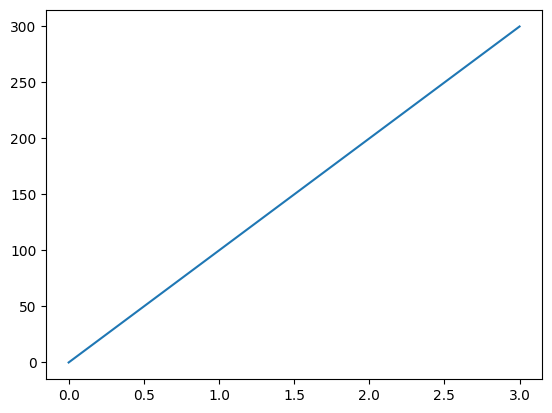

In [9]:
time = [0, 1, 2, 3]
position = [0, 100, 200, 300]

plt.plot(time, position)

You can see above that we used the Matplotlib alias `plt` followed by the name of a specific function in the package, `plot()`. This is the same syntax as when we used a pandas function, such as `pd.read_csv()`.

Another thing to note is that above the plot is some text, something like: `[<matplotlib.lines.Line2D at 0x7f72bc26ce20>]`. This is part of the output of the `plt.plot()` command, but typically not something that we care to see. We can generate the plot without this extra output, by including the command `plt.show()` at the end of the cell. Recall that Jupyter only shows the output of the last output-generating command in a cell, and `plt.show()` shows the plot without the extra text. It's good to make a habit of putting `plt.plot()` as the last line of code in any Jupyter cell you generate a plot in.

~~~python
# since we defined time and position above, no need to re-assign them here
plt.plot(time, position)
plt.show()
~~~

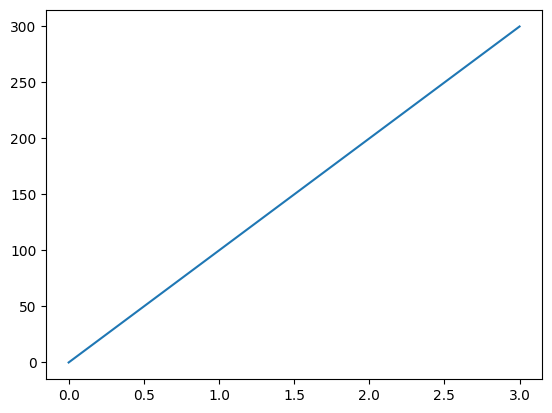

In [10]:
plt.plot(time, position)
plt.show()

## Labelling Axes
Matplotlib also allows us to modify the plot in many ways, which can improve the interpretability of a plot. For example, it's always good practice to label the axes of a plot. 

In most cases, the way we modify or enhance a Matplotlib plot are not by adding arguments to the `.plot()` command, but executing additional commands after `.plot()` that modify what was created by `.plot()`, culminating in the `plt.show()` command for the "final reveal":
~~~python
plt.plot(time, position)
plt.xlabel('Time (hr)')
plt.ylabel('Position (km)')
plt.show()
~~~

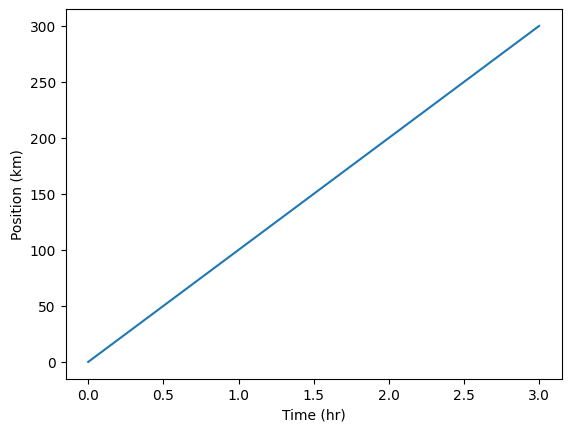

In [11]:
plt.plot(time, position)
plt.xlabel('Time (hr)')
plt.ylabel('Position (km)')
plt.show()

## Plotting pandas DataFrames

pandas is integrated with Matplotlib, making it easy to generate plots of data stored in pandas DataFrames. Methods are defined for pandas DataFrames that generate plots using Matplotlib.

### Import Data as a pandas DataFrame
Let's try this by first importing pandas and loading in the Gapminder Oceania data (`data/gapminder_gdp_oceania.csv`):

~~~python
import pandas as pd
df = pd.read_csv('data/gapminder_gdp_oceania.csv', index_col='country')
~~~

In [12]:
import pandas as pd 
df = pd.read_csv('data/gapminder_gdp_oceania.csv', index_col='country')

Let's see what this DataFrame looks like:
~~~python
df
~~~

In [13]:
df

,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
country,,,,,,,,,,,,
Australia,10039.59564,10949.64959,12217.22686,14526.12465,16788.62948,18334.19751,19477.00928,21888.88903,23424.76683,26997.93657,30687.75473,34435.36744
New Zealand,10556.57566,12247.39532,13175.67800,14463.91893,16046.03728,16233.71770,17632.41040,19007.19129,18363.32494,21050.41377,23189.80135,25185.00911


There are only two countries in this data set, which makes it easy to work with.

### Plotting directly from a pandas DataFrame

Our goal is to plot the GDP for a particular country (or countries), as a function of year. In other words, we want to plot a line for each country, with year on the *x* axis and GDP on the *y* axis.

Let's run the pandas `.plot()` method on our DataFrame to generate a Matplotlib plot:

~~~python
df.plot()
plt.show()
~~~

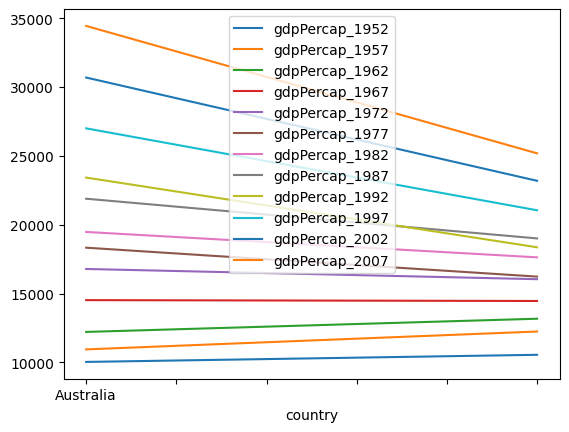

In [14]:
df.plot()
plt.show()

We get a plot all right, but it's not the most intuitive way to look at the data. What happened here? 

We can see from the legend that Python generated a line for each year in the data set, with country on the *x* axis. This is because **by default, Matplotlib will use the rows of a DataFrame as the *x* axis**, and use columns to define the groupings that define individual lines. But in our DataFrame, the rows (indexes) are the countries. 

We can change this by ***transposing*** the DataFrame, an operation which swaps the rows and columns (rows become columns, and vice-versa). To transpose the DataFrame we use the `.T` operator (note that `.T` is an operator, not a method, so you shouldn't add parentheses after the `T`)

~~~python
df.T.plot()
plt.show()
~~~

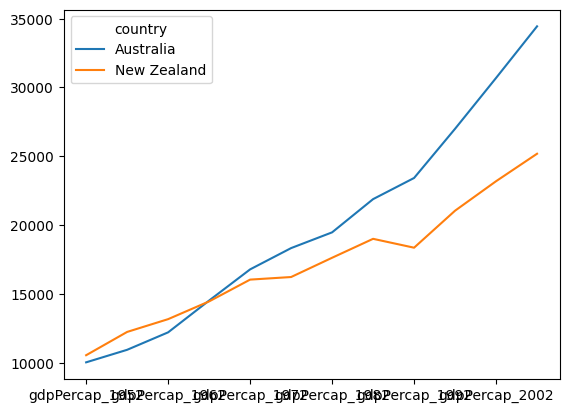

In [15]:
df.T.plot()
plt.show()  

You can see above that pandas + Matplotlib also recognizes the index of the DataFrame as labels, so a legend is automatically generated with the country names.

Another important point to note is that we applied `.T` "on the fly" in generating the plot. That is, we didn't modify the DataFrame `df` stored in memory. We just passed the data from `df` through the `.T` operator when we generated the plot. You can see that `df` is not transposed by viewing it again:

~~~python
df
~~~

In [ ]:
df

## Renaming Columns

The *x* axis labels in the above plot are hard to read, because each column name contains not only the year, but the preceding text `gdpPercap_`,  e.g., `gdpPercap_1972`. It would be nice to remove this leading text so column labels are just the numerical years. 

Fortunately, pandas has a `.str.strip()` method, which removes from the string the characters stated in the argument. This method works on strings, which is why we call `str` before `.strip()`. To rename the columns, we can rely on the fact that pandas DataFrames have a `.columns` property that allows us to refer to the entire set of column labels. 

~~~python
df.columns = df.columns.str.strip('gdpPercap_')
df
~~~


In [ ]:
df.columns = df.columns.str.strip().str[-4:]
df

Now if we plot `df` again, the *x* axis labels are clearer:

~~~python
df.T.plot()
plt.show()
~~~

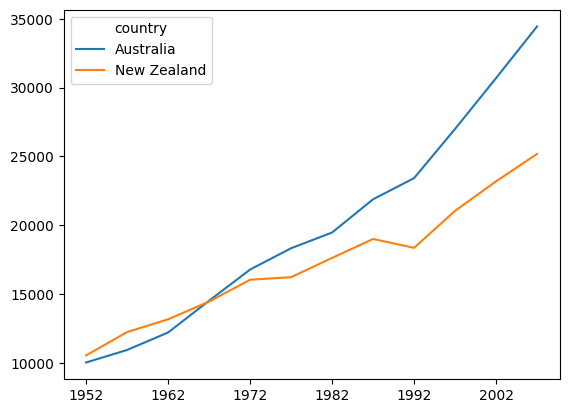

In [19]:
df.T.plot()
plt.show()

Look at the DataFrame now, to see the result:

    df

In [ ]:
df

## Customizing Plot Appearance

Matplotlib provides a huge number of options to customize the appearance of a plot. 

If we want to customize the colours of a plot with multiple categories (lines, bars, etc), we can pass a *keyword argument* (kwarg) to the `.plot()` method. To change line colours, we pass the kwarg `color=` followed by a list of color names, with the number of list items equal to the number of categories we're plotting (in this case, two). 

We can also add a label to the *y* axis using the `.ylabel()` function.

~~~python
df.T.plot(color=['red', 'blue'])
plt.ylabel('GDP per capita')
plt.show()
~~~

<div class="alert alert-block alert-info">
    <h3>Keyword arguments</h3>

`color=` is a particular kind of argument to a function, called a ***keyword argument*** (***kwarg***). Recall that arguments are information provided to a function that alter how it runs. kwargs are arguments that use a keyword (in this case, `color`), followed by the `=` sign, followed by a value to pass to the argument. kwargs are commonly used for optional arguments. A Python function that takes multiple arguments needs to know how to interpret each argument. Mandatory arguments typically are required to be listed in a particular order, which allows the function to know how to interpret each one. However, optional arguments might not occur, so order would not be a good way of determining the meaning of the argument. The keywords allow the function to know how to interpret each kwarg.
</div>



In [ ]:
df.T.plot(color=['red', 'blue'])
plt.ylabel('GDP per capita')
plt.show()

### Selecting subsets of a DataFrame

Above we selected only the data from Australia using `.loc[]`, and assigned that to `gdp_australia`. But more efficiently, using the pandas `.plot()` method, we can *chain* together the `.loc[]` selector and the `.plot()` method to select the relevant data 'on the fly' rather than first defining a variable to hold that data. 

For example we can plot the data for a specific country (Australia), by selecting it using the `.loc[]` method to select the index `Australia`:

~~~python
df.loc['Australia'].plot()
plt.show()
~~~

In [ ]:
df.loc['Australia'].plot()
plt.show()

We can customize this using the `color` and `linestyle` kwargs. Note that if we're only passing a single value to a kwarg, we don't use a list:

~~~python
df.loc['Australia'].plot(color='y', linestyle='--')
plt.show()
~~~

In [ ]:
df.loc['Australia'].plot(color='y', linestyle='--')
plt.show()

In [ ]:
df.loc['Australia'].plot(color='skyblue', linestyle=':')
plt.xlabel('Year')
plt.ylabel("GDP per capita")
plt.show()

## Types of plots

Matplotlib will make some assumptions about how to plot your data, based on the types of values it is given. However, you can override these defaults by specifying the type of plot you desire. For example, we can plot the same Gapminder data as bars, by using the keyword argument `kind='bar'`:

~~~python
df.T.plot(kind='bar')
plt.ylabel('GDP per capita')
plt.show()
~~~

In [ ]:
df.T.plot(kind='bar') 
plt.ylabel('GDP per capita')    
plt.show()

Something to get used to is that some plot styles can be defined as keyword arguments to `.plot()`, as above, others can be generated using subfunctions of `.plot`, such as `.plot.scatter()`, as below. Often, you can use either one to get the same result. It's often the case in Python that there are many different ways to do the same thing! 


## Scatterplots

Since Australia and New Zealand are in the same region of the world, and engage in a lot of trade with each other, it's likely that their GDPs are correlated with each other. That is, as Australia's GDP goes up, we would expect New Zealand's to go up similarly. 

Below we generate a *scatterplot* to examine whether the two Oceania countries' GDPs correlate. This requires a different type of data selection from the plots above, because here we want to use the data from one row as the *x* axis, and another row as the *y* axis — rather than using rows for groups and columns for the *x* axis. Fortunately, the pandas `.plot.scatter()` method recognizes our row names (indexes) so we just have to specify their names:

~~~python
df.T.plot.scatter(x='Australia', y='New Zealand')
plt.ylabel('GDP per capita')
plt.title('Relationship between GDP of Australia and New Zealand')
plt.show()
~~~

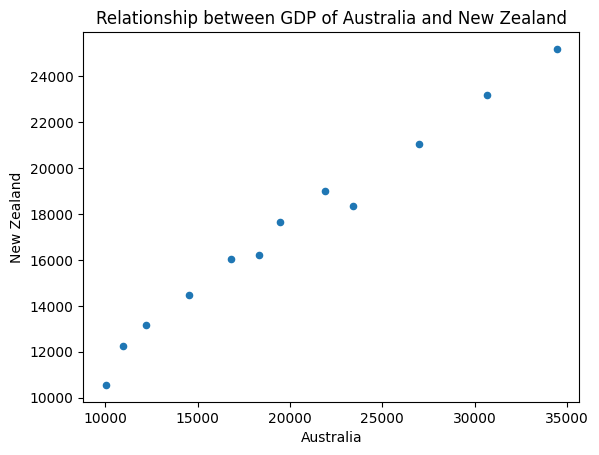

In [29]:
df.T.plot.scatter(x='Australia', y='New Zealand')
plt.ylabel('New Zealand')
plt.xlabel('Australia')
plt.title('Relationship between GDP of Australia and New Zealand')
plt.show()

## Exercises

### The Expanding Wealth Gap 

Fill in the blanks below to plot one line for the minimum GDP per capita over time of all the countries in Europe, and another line to plot the maximum GDP per capita over time for Europe.

~~~python
data_europe = pd.read_csv('data/gapminder_gdp_europe.csv', index_col='country')
data_europe.___.plot(label='min') # Method to find the minimum value
data_europe.___.plot(label='max') # Method to find the maximum value
plt.legend(loc='best')
plt.xticks(rotation=90)
plt.___() # Show plot
~~~

You might note that the variability in the maximum is much higher than that of the minimum. Take a look at the maximum and the max indexes:

~~~python
data_europe.max().plot()
plt.show()
print(data_europe.idxmax())
print(data_europe.idxmin())
~~~

### More Correlations

This short program creates a plot showing the correlation between GDP and life expectancy for 2007, normalizing marker size by population:

~~~python
data_all = pd.read_csv('data/gapminder_all.csv', index_col='country')
data_all.plot(kind='scatter', 
              x='gdpPercap_2007', 
              y='lifeExp_2007',
              s=data_all['pop_2007'] / 1e6
             )
plt.show()
~~~

Using online help and other resources, explain what each argument to `plot()` does.

## Saving your plot to a file

If you are satisfied with the plot you see you may want to save it to a file, perhaps to include it in a publication. There is a function in the `matplotlib.pyplot` module that accomplishes this: `.savefig()`. Calling this function, e.g. with

~~~python
plt.savefig('my_figure.png')
~~~

will save the current figure to the file `my_figure.png`. The file format will automatically be deduced from the file name extension (other formats are pdf, ps, eps and svg).

Note that, when we're using the functional approach to Matplotlib, functions in `plt` refer to a global figure variable and after a figure has been displayed to the screen (e.g. with `plt.show()`) Matplotlib will make this variable refer to a new empty figure. Therefore, make sure you call `plt.savefig()` *before* the plot is displayed to the screen, otherwise you may find a file with an empty plot.

~~~python
df.T.plot(kind='bar')
plt.savefig('my_figure.png')
plt.show()
~~~

---
## Summary of Key Points

- Matplotlib is the most widely used scientific plotting library in Python.
- Methods allow you to plot data directly from a pandas dataframe.
- It is common to need to select and transform data, then plot it.
- Many styles of plot are available: see the [Python Graph Gallery](https://python-graph-gallery.com/matplotlib/) for more options.
- It's possible to plot many sets of data together


---
This lesson is adapted from the [Software Carpentry](https://software-carpentry.org/lessons/) [Plotting and Programming in Python](http://swcarpentry.github.io/python-novice-gapminder/) workshop. 